In [1]:
! mkdir "/content/kaggle"
! mkdir "/content/kaggle/datasets"
! cp -r "/content/drive/MyDrive/Kaggle/Rice Plant Detection" "/content/kaggle/datasets"

In [3]:
import os
Training_dir = os.path.join("/content/kaggle/datasets/Rice Plant Detection/RiceDiseaseDataset/train")
Testing_dir = os.path.join("/content/kaggle/datasets/Rice Plant Detection/RiceDiseaseDataset/validation")
brownspot_dir = os.path.join("/content/kaggle/datasets/Rice Plant Detection/RiceDiseaseDataset/train/BrownSpot")
healthy_dir = os.path.join("/content/kaggle/datasets/Rice Plant Detection/RiceDiseaseDataset/train/Healthy")
hispa_dir = os.path.join("/content/kaggle/datasets/Rice Plant Detection/RiceDiseaseDataset/train/Hispa")
leafblast_dir = os.path.join("/content/kaggle/datasets/Rice Plant Detection/RiceDiseaseDataset/train/LeafBlast")
brownspot_files = os.listdir(brownspot_dir)
healthy_files = os.listdir(healthy_dir)
hispa_files = os.listdir(hispa_dir)
leafblast_files = os.listdir(leafblast_dir)

In [4]:
print('total training brown spot:', len(os.listdir(brownspot_dir)))
print('total training healthy:', len(os.listdir(healthy_dir)))
print('total training hispa:', len(os.listdir(hispa_dir)))
print('total training leaf blast:', len(os.listdir(leafblast_dir)))

total training brown spot: 400
total training healthy: 400
total training hispa: 400
total training leaf blast: 400


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_brownspot = [os.path.join(brownspot_dir, fname) 
                for fname in brownspot_files[pic_index-2:pic_index]]
next_healthy = [os.path.join(healthy_dir, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]
next_hispa = [os.path.join(hispa_dir, fname) 
                for fname in hispa_files[pic_index-2:pic_index]]
next_leafblast = [os.path.join(leafblast_dir, fname) 
                for fname in leafblast_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_brownspot+next_healthy+next_hispa+next_leafblast):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
import matplotlib.pyplot as plt
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications import DenseNet201

In [7]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	Training_dir,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=32
)
validation_generator = validation_datagen.flow_from_directory(
	Testing_dir,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=32
)

Found 1600 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


In [ ]:
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False

In [17]:
input_model = pretrained_model.input
layer_tambah = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model.output)
output_model = tf.keras.layers.Dense(4, activation='softmax')(layer_tambah)
model = tf.keras.Model(inputs=input_model, outputs=output_model)

In [ ]:
model.summary()

In [19]:
loss_param = "categorical_crossentropy"
EPOCHS = 40
optim = Adam(lr=0.0001)
steps = 50

In [20]:
model.compile(loss = loss_param, optimizer= optim, metrics=['accuracy'])
history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=steps, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/40
50/50 [==============================] - 230s 4s/step - loss: 1.4483 - accuracy: 0.3221 - val_loss: 1.2155 - val_accuracy: 0.4583
Epoch 2/40
50/50 [==============================] - 184s 4s/step - loss: 1.2094 - accuracy: 0.4556 - val_loss: 1.2160 - val_accuracy: 0.4062
Epoch 3/40
50/50 [==============================] - 181s 4s/step - loss: 1.1508 - accuracy: 0.4794 - val_loss: 1.1954 - val_accuracy: 0.4583
Epoch 4/40
50/50 [==============================] - 180s 4s/step - loss: 1.1405 - accuracy: 0.4978 - val_loss: 1.1558 - val_accuracy: 0.4896
Epoch 5/40
50/50 [==============================] - 182s 4s/step - loss: 1.0942 - accuracy: 0.5349 - val_loss: 1.1096 - val_accuracy: 0.5417
Epoch 6/40
50/50 [==============================] - 180s 4s/step - loss: 1.0457 - accuracy: 0.5433 - val_loss: 1.1280 - val_accuracy: 0.4479
Epoch 7/40
50/50 [==============================] - 181s 4s/step - loss: 1.0199 - accuracy: 0.5573 - val_loss: 1.4341 - val_accuracy: 0.3750
Epoch 8/40
50

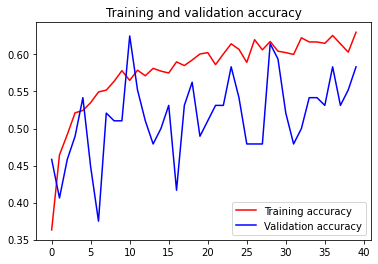

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()